Pandas, sklearn, numpy, matplotlib, and seaborn. Let’s initialize these libraries

In [2]:
#import required libraries

#for data import and basic oprtaion
import pandas as pd
import numpy as np

#for visulization and plotting
import matplotlib.pyplot as plt
import seaborn as sns

#to view the plots in the jupyter notebook inline
%matplotlib inline

#to create the confusion matrix
from sklearn import metrics

#to split the dataset into train and test
from sklearn.model_selection import train_test_split
#or! Earlier train_test_split was in cross_validation
#from sklearn.cross_validation import train_test_split

#to apply logistic regresison
from sklearn.linear_model import LogisticRegression

Marks1- Marks of the student in the 1st subject
Marks2- Marks of the student in the 2nd subject
Admission- Response variable which has value either 0 or 1. 1 means the student will get admission and 0 means no admission

In [24]:
import pandas as pd
df=pd.read_csv("student_data.csv")


In [25]:
#check top records
df.head()

,Marks 1,Marks 2,Admission
0,75,70,0
1,80,85,1
2,65,60,0
3,90,95,1
4,85,75,1


In [26]:
#check info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Marks 1    100 non-null    int64
 1   Marks 2    100 non-null    int64
 2   Admission  100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


In [27]:
#split dataset in features and target variable
feature_cols = ['Marks 1', 'Marks 2']
X = df[feature_cols] # Features
y = df.Admission # Target variable

In [29]:
print(X.head())


   Marks 1  Marks 2
0       75       70
1       80       85
2       65       60
3       90       95
4       85       75


In [30]:
print(y.head())

0    0
1    1
2    0
3    1
4    1
Name: Admission, dtype: int64


We can use the function train_test_split() which is a part of sklearn library. This has majorly 4 argument-

Independent variable – X
Dependent variable- y
Test_size- This basically says the percentage of records we want to put in the test dataset. There is no specific rule on how much we should keep but ideally, it can be 40% or 30% or even 50%. This completely depends on the size of the dataset. If we have more samples, we can go ahead with more records in test dataset else less. As we just have 100 records in our dataset and so, let’s keep 25% records in test dataset and the remaining 75% in training dataset.
Random_state- to maintain the reproducibility of the random splitted data

In [31]:
#split the dataset in train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

X_train.shape



(75, 2)

In [32]:
X_test.shape

(25, 2)

import the Logistic Regression module from sklearn.linear_model. And then need to create the logistic regression in 
python using LogisticRegression() function.

In [33]:
# instantiate the model using the default parameters
m1 = LogisticRegression()

# fit the model with data
m1.fit(X_train,y_train)

LogisticRegression()

We can use the predict() function for the prediction on the test dataset. It takes the testing dataset (X_test in our case) as an argument.

In [34]:
#prediction on test dataset
y_pred=m1.predict(X_test)

y_test

26    0
86    0
2     0
55    1
75    1
93    1
16    0
73    1
54    1
95    1
53    1
92    0
78    1
13    1
7     1
30    0
22    0
24    1
33    1
8     1
43    1
62    0
3     1
71    1
45    1
Name: Admission, dtype: int64

In [35]:
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1], dtype=int64)

In [36]:
y_test

26    0
86    0
2     0
55    1
75    1
93    1
16    0
73    1
54    1
95    1
53    1
92    0
78    1
13    1
7     1
30    0
22    0
24    1
33    1
8     1
43    1
62    0
3     1
71    1
45    1
Name: Admission, dtype: int64

A confusion matrix is basically a two-way frequency table which is used to find the accuracy and error of the model. This tells about the number of correct and incorrect predictions for both 1 and o.

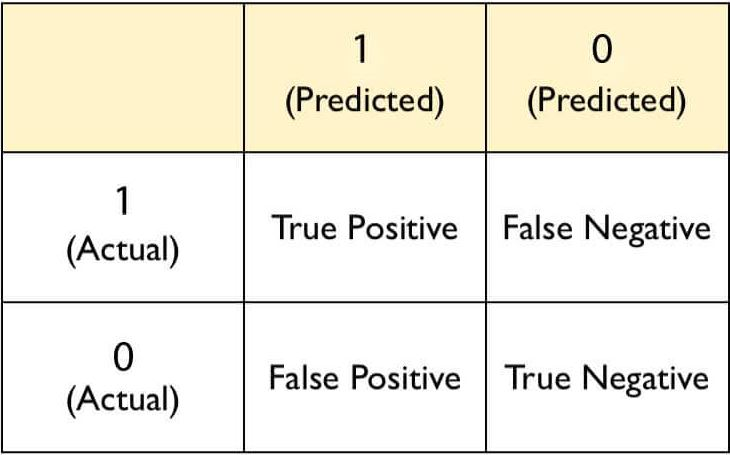

In [37]:
#confusion matrix
c1 = metrics.confusion_matrix(y_test, y_pred)
print(c1)

[[ 8  0]
 [ 0 17]]


This confusion matrix says-

True positive (TP): 8the classifier correctly predicted admission for 8 samples, and these samples actually got admission.ly)
True negative (TN)7 1This means that the classifier correctly predicted no admission for 17 samples, and these samples didn't actually get admission.ion)
False positive (FP): 0 (We predicted student will get admission but originally these students didn’t get admission)
False negative (0N): 3 (We predicted student won’t get admission but originally these students didn’t get admission)

Accuracy- This is being given by the same confusion matrix which we drew above
Precision- It’s about being precise! Means how accurate our model is
Recall- Test for how correctly our model is able to predict that the students have got admission

In [38]:
#evaluation metrices
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


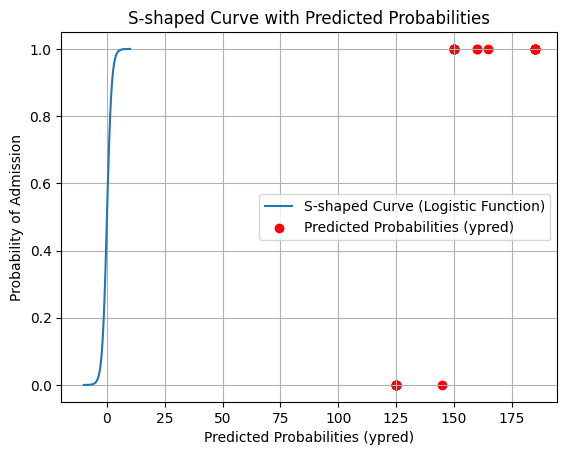

In [43]:
# Defining logistic function
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Creating a range of x values
x_values = np.linspace(-10, 10, 100)

# Applying logistic function to x values
y_values = logistic(x_values)
comb_marks=X_test['Marks 1']+X_test['Marks 2']
# Plotting the S-shaped curve
plt.plot(x_values, y_values, label='S-shaped Curve (Logistic Function)')
plt.scatter(comb_marks, y_pred, color='red', label='Predicted Probabilities (ypred)')
plt.title('S-shaped Curve with Predicted Probabilities')
plt.xlabel('Predicted Probabilities (ypred)')
plt.ylabel('Probability of Admission')
plt.legend()
plt.grid(True)
plt.show()